# Overview

VLA 22A-020 observed NaCl and KCl transitions toward Sgr B2 in the Ku band.

PRIMOS detected NaCl 1-0 emission (in 5 hyperfine transitions) at 13.026 GHz at T$_A^*\sim0.05$ K.  The GBT beam at 13 GHz is 

In [14]:
import numpy as np
from astropy import units as u

In [30]:
nacl10rest = 13.026012279345801*u.GHz

In [39]:
gbtbeam = (1.22 * nacl10rest.to(u.m, u.spectral()) / (100*u.m)).to(u.arcsec, u.dimensionless_angles())
gbtbeamarea = (2*np.pi*(gbtbeam/2.35)**2)
gbtbeam

<Quantity 57.91541645 arcsec>

This gives a flux density:

In [41]:
(0.05*u.K ).to(u.Jy, u.brightness_temperature(frequency=nacl10rest, beam_area=gbtbeamarea))

<Quantity 0.02338014 Jy>

The observations achieved a beam size about 0.4"x0.2" with robust=2:

In [43]:
vlabeam = SpectralCube.read('allEBs.center.robust2.downsample.spw30.big-coarse.clean.image').beams.common_beam()
vlabeam

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Beam: BMAJ=0.371882545651787 arcsec BMIN=0.18783121045288526 arcsec BPA=-17.51531062853354 deg

If the emission were concentrated into a single beam, then the peak brightness would be:

In [44]:
0.05*u.K * (gbtbeamarea/vlabeam.sr).decompose()

<Quantity 2410.81864985 K>

The typical uncertainty achieved in our data is:

In [55]:
uncertainty = SpectralCube.read('allEBs.center.robust2.downsample.spw30.big-coarse.clean.image.contsub.fits', use_dask=True).std()
uncertainty

<Quantity 0.00049218 Jy / beam>

In [56]:
uncertainty.to(u.K, u.brightness_temperature(nacl10rest, beam_area=vlabeam))

<Quantity 50.75048338 K>

This is per channel with width:

In [57]:
SpectralCube.read('allEBs.center.robust2.downsample.spw30.big-coarse.clean.image').with_spectral_unit(u.km/u.s, rest_value=nacl10rest, velocity_convention='radio').spectral_axis.diff().mean()

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


<Quantity -2.87655276 km / s>

In other words, we'd detect a single maser at ~40-50 sigma.

### listobs: https://data.rc.ufl.edu/secure/adamginsburg/SgrB2/VLA-22A-020/pipeline-20220501T121433/html/t2-1.html?sidebar=sidebar_22A_020_sb41257746_eb41788351_59700_31502699074_ms&subpage=listobs.txt

In [33]:
from spectral_cube import SpectralCube

In [34]:
cd ../imaging/

/orange/adamginsburg/sgrb2/22A-020/imaging


In [68]:
%%bash
cd ../contsub
ln -s ../imaging/*contsub*fits .
cd ../imaging

ln: failed to create symbolic link ‘./allEBs.center.spw16.big-coarse.liteclean.image.contsub.14.49.fits’: File exists
ln: failed to create symbolic link ‘./allEBs.center.spw16.big-coarse.liteclean.image.contsub.fits’: File exists
ln: failed to create symbolic link ‘./allEBs.center.spw30.big-coarse.liteclean.image.contsub.13.02.fits’: File exists
ln: failed to create symbolic link ‘./allEBs.center.spw30.big-coarse.liteclean.image.contsub.fits’: File exists
ln: failed to create symbolic link ‘./allEBs.sgrb2m.spw10.liteclean.image.contsub.15.09.fits’: File exists
ln: failed to create symbolic link ‘./allEBs.sgrb2m.spw10.liteclean.image.contsub.fits’: File exists
ln: failed to create symbolic link ‘./allEBs.sgrb2m.spw11.liteclean.image.contsub.14.96.fits’: File exists
ln: failed to create symbolic link ‘./allEBs.sgrb2m.spw11.liteclean.image.contsub.fits’: File exists
ln: failed to create symbolic link ‘./allEBs.sgrb2m.spw12.liteclean.image.contsub.14.83.fits’: File exists
ln: failed to cre

In [52]:
ls -d *allEBs.center.*.spw30.big*clean*

allEBs.center.robust2.downsample.spw30.big-coarse.clean.image/
allEBs.center.robust2.downsample.spw30.big-coarse.clean.image.contsub.13.02.fits
allEBs.center.robust2.downsample.spw30.big-coarse.clean.image.contsub.fits
allEBs.center.robust2.downsample.spw30.big-coarse.clean.mask/
allEBs.center.robust2.downsample.spw30.big-coarse.clean.model/
allEBs.center.robust2.downsample.spw30.big-coarse.clean.pb/
allEBs.center.robust2.downsample.spw30.big-coarse.clean.psf/
allEBs.center.robust2.downsample.spw30.big-coarse.clean.residual/
allEBs.center.robust2.downsample.spw30.big-coarse.clean.sumwt/
allEBs.center.robust2.spw30.big-coarse.clean.image/
allEBs.center.robust2.spw30.big-coarse.clean.image.contsub.13.02.fits
allEBs.center.robust2.spw30.big-coarse.clean.image.contsub.fits
allEBs.center.robust2.spw30.big-coarse.clean.mask/
allEBs.center.robust2.spw30.big-coarse.clean.model/
allEBs.center.robust2.spw30.big-coarse.clean.pb/
allEBs.center.robust2.spw30.big-coarse.clean.psf/
allEBs.center.robu

In [58]:
pth = 'allEBs.center.robust2.downsample.spw30.big-coarse.clean.image'

if False: # the continuum subtraction is handled in contsub.py
    if not os.path.exists(pth+".contsub.fits"):
        naclcube = SpectralCube.read(pth).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nacl00rest)
        cont = naclcube.median(axis=0)
        contsub = naclcube - cont
        contsub.write(pth+".contsub.fits")
naclcube = SpectralCube.read(pth+".contsub.fits").with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nacl00rest)
naclcube

VaryingResolutionSpectralCube with shape=(64, 2000, 2000) and unit=Jy / beam:
 n_x:   2000  type_x: RA---SIN  unit_x: deg    range:   266.801785 deg:  266.864913 deg
 n_y:   2000  type_y: DEC--SIN  unit_y: deg    range:   -28.405552 deg:  -28.350024 deg
 n_s:     64  type_s: VRAD      unit_s: km / s  range:        4.085 km / s:     185.308 km / s

In [15]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['image.interpolation'] = 'none'
from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2ae738169e80>

/blue/adamginsburg/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


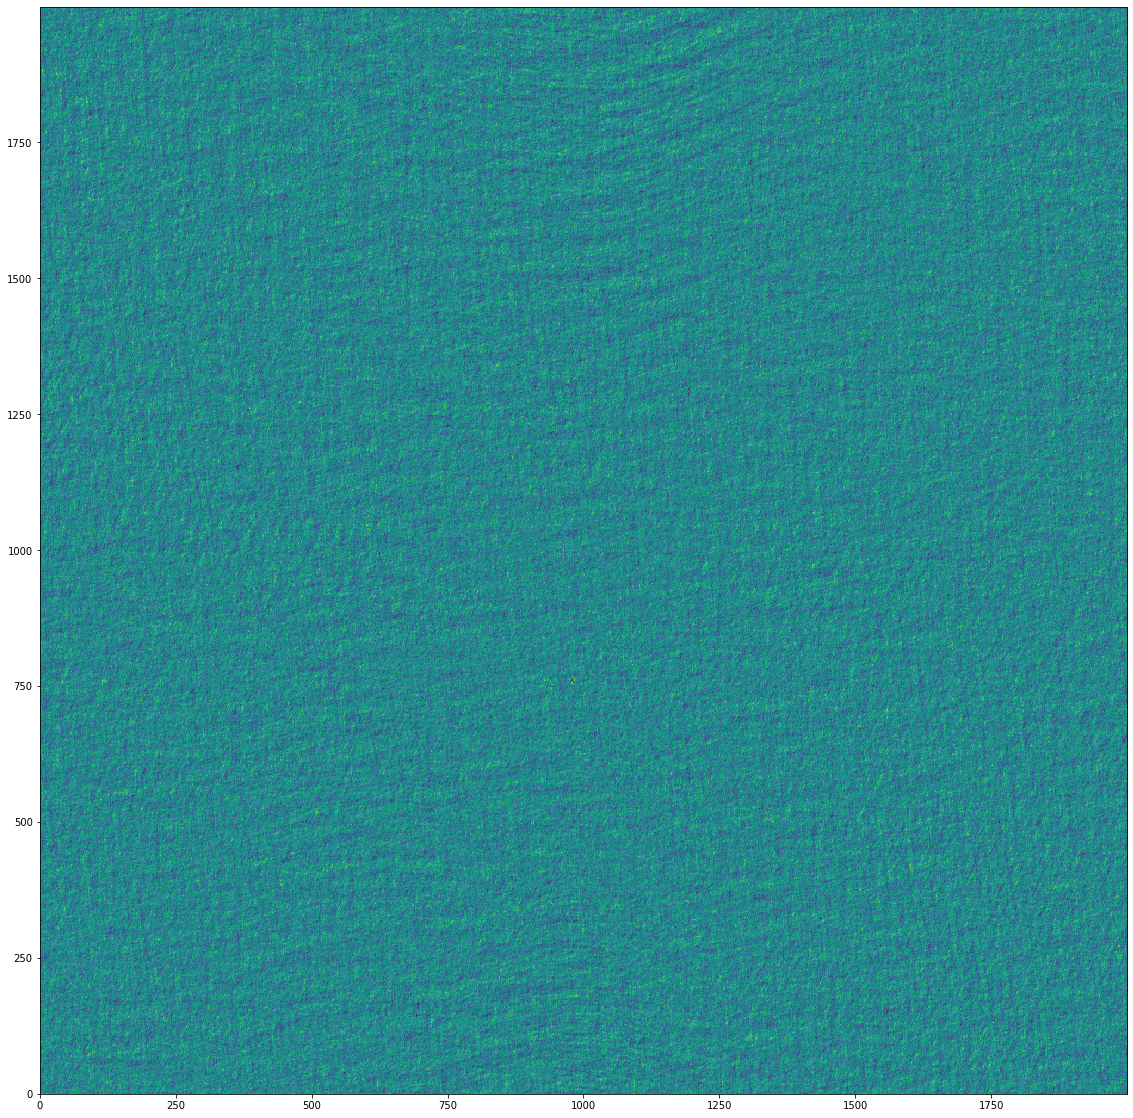

In [65]:
pl.figure(figsize=(20,20))
m0 = naclcube.spectral_slab(40*u.km/u.s, 76*u.km/u.s).moment0(axis=0)
m0.quicklook()

/blue/adamginsburg/adamginsburg/repos/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


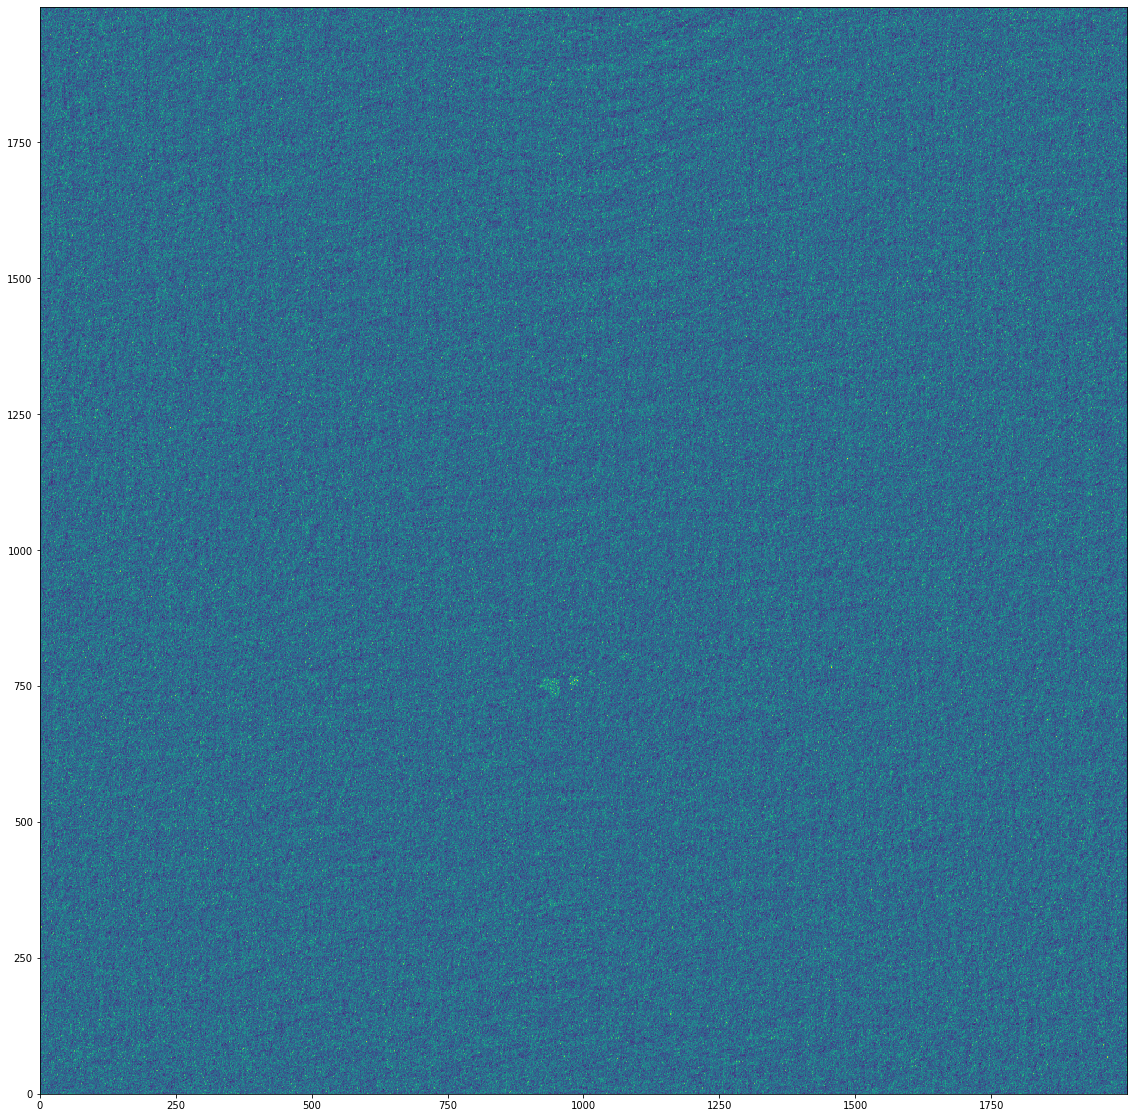

In [66]:
pl.figure(figsize=(20,20))
mx = naclcube.spectral_slab(40*u.km/u.s, 76*u.km/u.s).max(axis=0)
mx.quicklook()

In [69]:
import regions

In [78]:
hiiregions = regions.Regions.read("../regions_2018paper/SgrB2_1.3cm_hiiRegions_masked_Done.reg")
named_regions = {r.meta['text']: r for r in hiiregions if 'text' in r.meta}

In [80]:
targets = [('K1', 'K2', 'K3'), 'K4', 'Z10.24', 'I', 'E', 'B', 'G', ('F2', 'F1', 'F10.303', 'F3', 'F4')]

In [93]:
def getreg(tgt):
    if isinstance(tgt, tuple):
        reg = regions.Regions([named_regions[x] for x in tgt])
    else:
        reg = regions.Regions([named_regions[tgt]])                              
    return reg

In [82]:
ls -d *spw16*fits

allEBs.center.spw16.big-coarse.liteclean.image.contsub.14.49.fits
allEBs.center.spw16.big-coarse.liteclean.image.contsub.fits
allEBs.sgrb2m.spw16.liteclean.image.contsub.14.49.fits
allEBs.sgrb2m.spw16.liteclean.image.contsub.fits
allEBs.sgrb2n.spw16.liteclean.image.contsub.14.49.fits
allEBs.sgrb2n.spw16.liteclean.image.contsub.fits
eb41788351.59700.31502699074.center.spw16.big-coarse.clean.image.contsub.14.49.fits
eb41788351.59700.31502699074.center.spw16.big-coarse.clean.image.contsub.fits
eb41788351.59700.31502699074.center.spw16.big-coarse.dirty.image.contsub.14.49.fits
eb41788351.59700.31502699074.center.spw16.big-coarse.dirty.image.contsub.fits
eb41788351.59700.31502699074.sgrb2m.spw16.dirty.image.contsub.14.49.fits
eb41788351.59700.31502699074.sgrb2m.spw16.dirty.image.contsub.fits
eb41788351.59700.31502699074.sgrb2n.spw16.dirty.image.contsub.14.49.fits
eb41788351.59700.31502699074.sgrb2n.spw16.dirty.image.contsub.fits
eb41789929.59703.295863067135.center.spw16.big-coarse.clean.im

In [105]:
ls -d all*spw31*

allEBs.center.robust2.spw31.big-coarse.clean.image/
allEBs.center.robust2.spw31.big-coarse.clean.image.contsub.13.05.fits
allEBs.center.robust2.spw31.big-coarse.clean.image.contsub.fits
allEBs.center.robust2.spw31.big-coarse.clean.mask/
allEBs.center.robust2.spw31.big-coarse.clean.model/
allEBs.center.robust2.spw31.big-coarse.clean.pb/
allEBs.center.robust2.spw31.big-coarse.clean.psf/
allEBs.center.robust2.spw31.big-coarse.clean.residual/
allEBs.center.robust2.spw31.big-coarse.clean.sumwt/
allEBs.center.robust2.spw31.big-coarse.liteclean.image/
allEBs.center.robust2.spw31.big-coarse.liteclean.image.contsub.13.05.fits
allEBs.center.robust2.spw31.big-coarse.liteclean.image.contsub.fits
allEBs.center.robust2.spw31.big-coarse.liteclean.mask/
allEBs.center.robust2.spw31.big-coarse.liteclean.model/
allEBs.center.robust2.spw31.big-coarse.liteclean.pb/
allEBs.center.robust2.spw31.big-coarse.liteclean.psf/
allEBs.center.robust2.spw31.big-coarse.liteclean.residual/
allEBs.center.robust2.spw31.bi

In [106]:
fns = ['allEBs.center.robust2.spw31.big-coarse.clean.image',
       'allEBs.center.robust2.downsample.spw30.big-coarse.clean.image',
       'allEBs.center.robust2.spw30.big-coarse.clean.image',
       'allEBs.center.spw16.big-coarse.liteclean.image']

In [107]:
cubes = [SpectralCube.read(fn, use_dask=True) for fn in fns]

In [97]:
h2co22freq = 14.488*u.GHz

In [99]:
import warnings
warnings.filterwarnings('ignore')

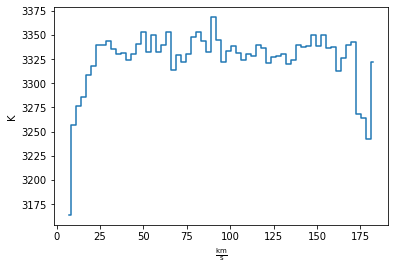

In [103]:
cube=cubes[0]
meanspec = cube.subcube_from_regions(reg).with_spectral_unit(u.km/u.s, rest_value=nacl10rest, velocity_convention='radio').to(u.K).mean(axis=(1,2))
meanspec[1:-1].with_spectral_unit(u.km/u.s).quicklook()

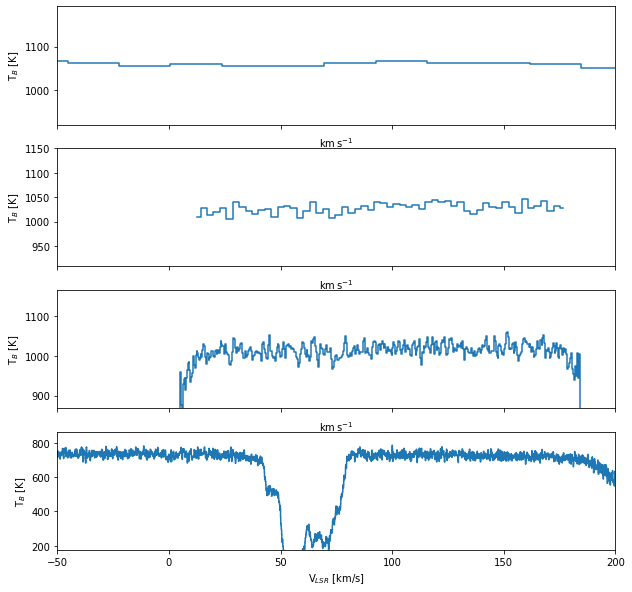

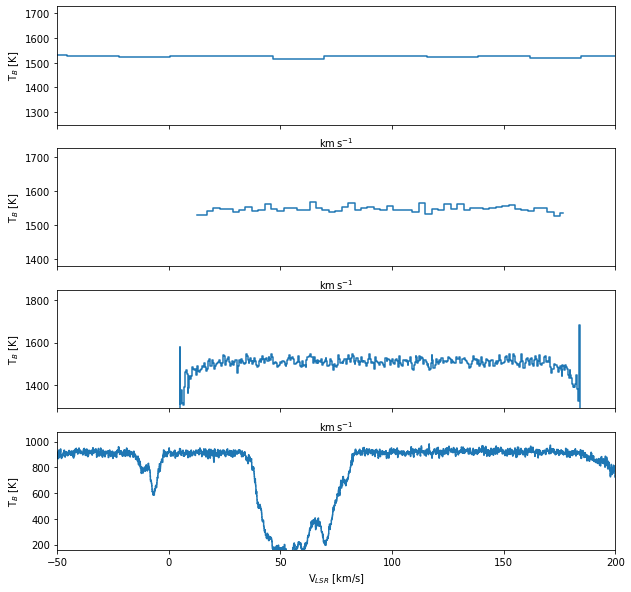

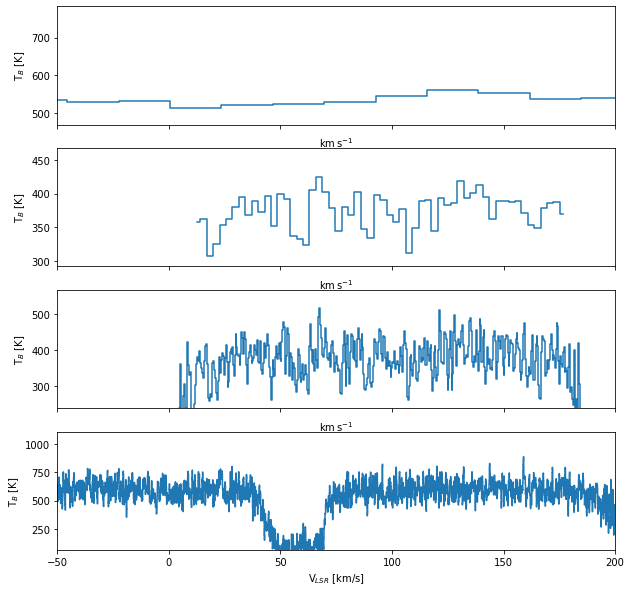

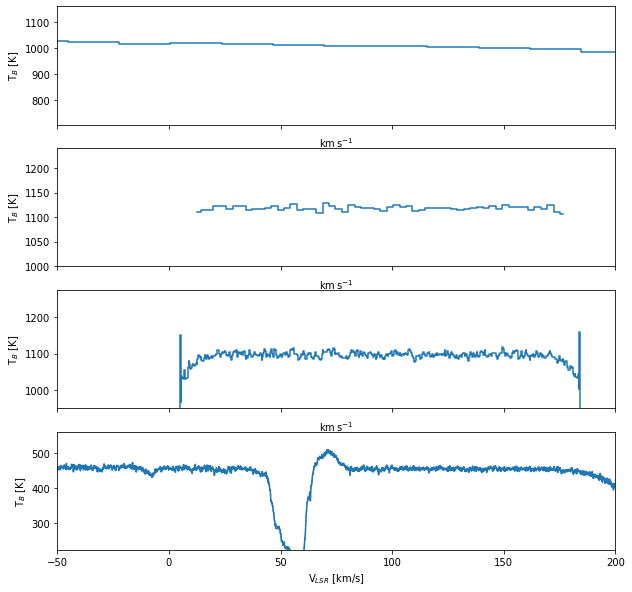

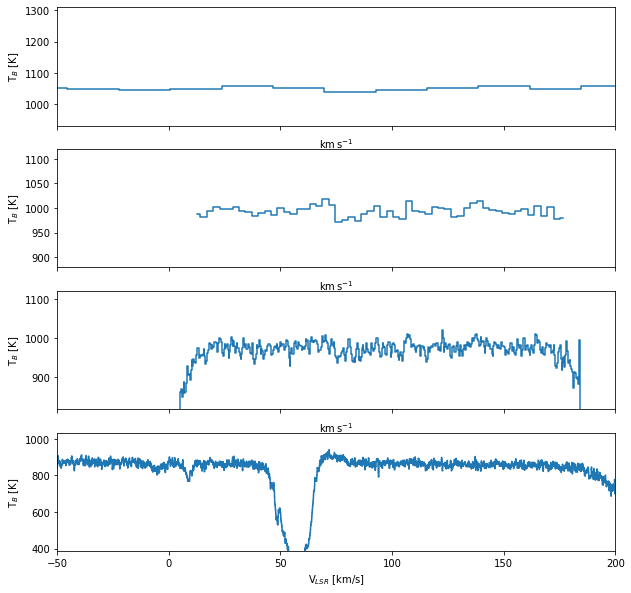

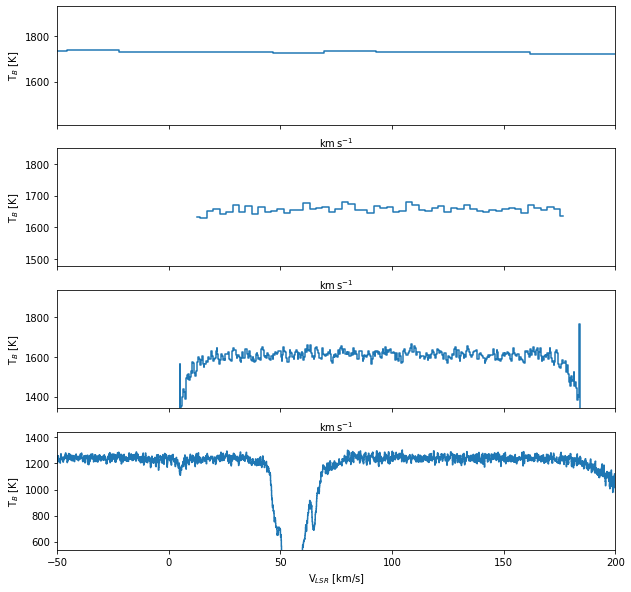

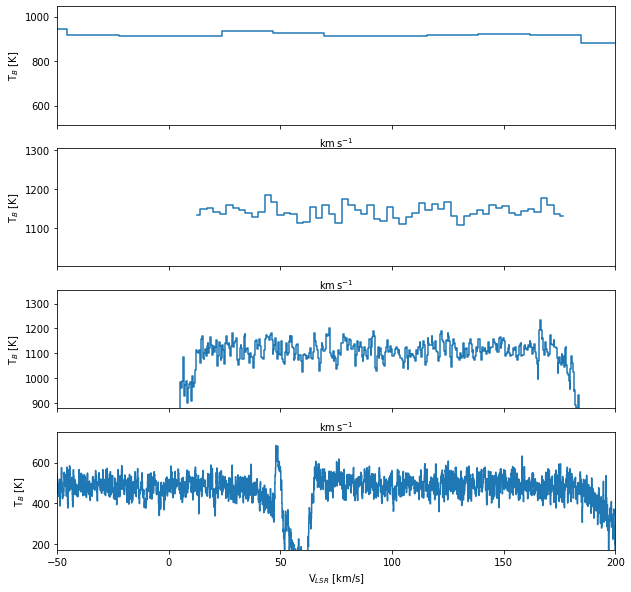

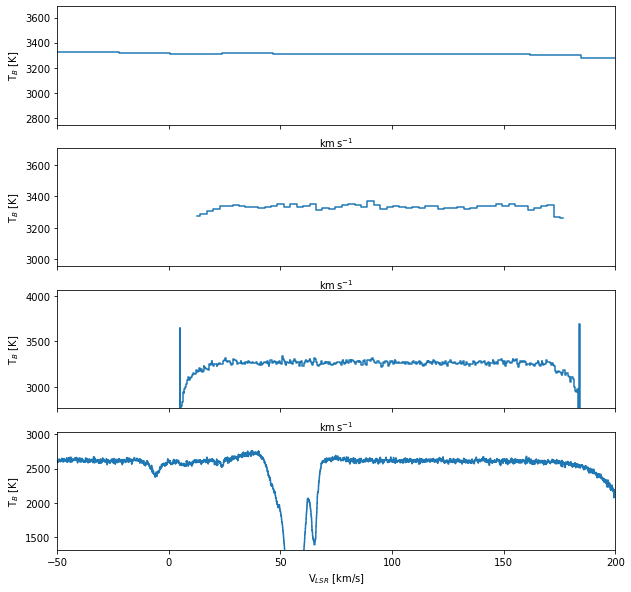

In [113]:
for tgt in targets:
    reg = getreg(tgt)
    name = "".join(tgt)
    fig = pl.figure(figsize=(10,10))
    for ii, cube in enumerate(cubes):
        ax = pl.subplot(4,1,ii+1)
        meanspec = cube.subcube_from_regions(reg).with_spectral_unit(u.km/u.s, rest_value=nacl10rest if ii<3 else h2co22freq, velocity_convention='radio').to(u.K).mean(axis=(1,2))
        if ii < 3:
            meanspec = meanspec[3:-3].with_spectral_unit(u.km/u.s) # chop out bad edge pixels
        ax.plot(meanspec.spectral_axis, meanspec.value, drawstyle='steps-mid')
        ax.set_xlim(-50, 200)
        ax.set_ylim(np.percentile(meanspec.value, 5)*0.9, np.percentile(meanspec.value, 99.99)*1.1)
        if ii == 3:
            ax.set_xlabel("V$_{LSR}$ [km/s]")
        else:
            ax.set_xticklabels('')
            ax.set_xlabel("")
        ax.set_ylabel("T$_B$ [K]")
        if ii == 0:
            ax.set_title(name)
    fig.savefig(f"../figures/{name}_spectra.png")

In [1]:
pwd

'/orange/adamginsburg/sgrb2/22A-020/code'

In [2]:
from astropy.table import Table

In [6]:
!head ../PRIMOS_spectrum.txt

1710.17179132 -0.01598832
1710.19621032 0.00084532
1710.22062932 0.01806132
1710.24504832 0.01551032
1710.26946732 0.00837832
1710.29388632 0.00780932
1710.31830532 0.00343732
1710.34272432 0.009524319999999999
1710.36714232 0.00190832
1710.39156132 -0.00514132


In [48]:
from astropy.table import Table
primos = Table.read('../PRIMOS_spectrum.txt', format='ascii.no_header')
pfrq = (primos['col1'] * u.MHz).to(u.GHz)
pamp = primos['col2'] * u.K

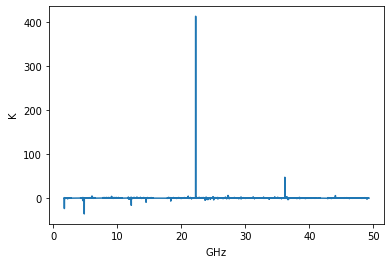

In [49]:
pl.plot(pfrq,pamp)

In [50]:
from astropy.coordinates import SkyCoord

In [51]:
primos_center = SkyCoord('17h47m19.8', '-28:22:17', unit=(u.h, u.deg), frame='fk5')

In [52]:
import glob
import regions
from astropy import wcs
from astropy.io import fits

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


FileNotFoundError: [Errno 2] No such file or directory: 'primos_spectra/pngs/{fn}.meanspec.png'

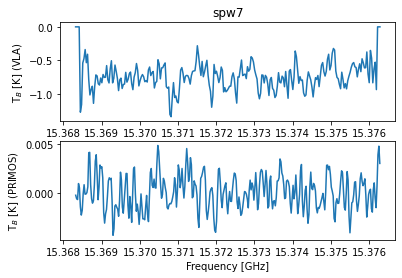

In [61]:
for fn in glob.glob("allEB*.image"):
    specfn = f'primos_spectra/{fn}.meanspec.fits'
    if not os.path.exists(specfn):
        cube = SpectralCube.read(fn, use_dask=True).with_spectral_unit(u.GHz)
        # estimate of GBT beam
        primos_fwhm = (cube.spectral_axis.mean().to(u.m, u.spectral()) / (100*u.m)).to(u.arcsec, u.dimensionless_angles())
        aperture = regions.CircleSkyRegion(center=primos_center, radius=primos_fwhm/2)
        try:
            subcube = cube.subcube_from_regions([aperture])
        except ValueError as ex:
            continue
        meanspec = subcube.mean(axis=(1,2)).to(u.K)
        hdu = meanspec.hdu
        hdu.writeto(specfn)
        xax = meanspec.spectral_axis
        yax = meanspec.value
    else:
        hdu = fits.open(specfn)[0]
        yax = hdu.data
        xax = wcs.WCS(hdu.header).pixel_to_world(np.arange(len(yax))).to(u.GHz)
    
    fig = pl.figure()
    ax = fig.add_subplot(2,1,1)
    ax.plot(xax, yax)
    ax.set_xlabel("Frequency [GHz]")
    ax.set_ylabel("T$_B$ [K] (VLA)")
    ax.set_title(fn.split(".")[2])
    
    sel = (pfrq > xax.min()) & (pfrq < xax.max())
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(pfrq[sel], pamp[sel])
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xlabel("Frequency [GHz]")
    ax2.set_ylabel("T$_B$ [K] (PRIMOS)")
    
    fig.savefig('primos_spectra/pngs/{fn}.meanspec.png', bbox_inches='tight')